In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina'
%config Completer.use_jedi = False # this to force autocompletion 
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf


In [3]:
from copyreg import pickle
from nltk.corpus import wordnet as wn
from nltk.tokenize import word_tokenize
from nltk.inference.prover9 import nltk
from nltk.stem import WordNetLemmatizer
from tqdm import tqdm
import numpy as np
import pandas as pd
import tensorflow as tf
from keras_preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot
from sklearn.model_selection import train_test_split
from keras.models import Model
from sklearn import metrics
import matplotlib as plt
import os
from tensorflow.keras.optimizers import RMSprop
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from keras.callbacks import EarlyStopping
from keras.layers import LSTM, Activation, Dense, Dropout
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
import nltk
import re
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import words
nltk.download('words')
stopwords = stopwords.words('english')
nltk.download('stopwords')
nltk.download('omw-1.4')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\rejee\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rejee\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\rejee\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [5]:
!pip install tensorflow

In [4]:
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rejee\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rejee\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [8]:
!pip install wordcloud


In [6]:
from tqdm.notebook import tqdm_notebook
tqdm_notebook.pandas()

In [7]:
import string 
from wordcloud import wordcloud

In [21]:
df=pd.read_csv(r'C:\Users\rejee\Desktop\Agitation.csv')

In [9]:
df

,timestamp (ET),agitimestamp (ET),Location,level,Observation,Behaviour
0,12/10/2016 21:02,12/10/2016 21:00,Kitchen,5,Withdrawn,Normal
1,12/15/2016 3:22,12/15/2016 3:21,Kitchen,3,"Vocal1, Withdrawn",Normal
2,12/15/2016 19:14,12/16/2016 2:20,Other,3,Withdrawn,Normal
3,12/19/2016 1:57,12/19/2016 1:55,Other,4,Withdrawn,Normal
4,12/28/2016 20:36,12/28/2016 19:00,Other,4,"Vocal2, Withdrawn",Normal
...,...,...,...,...,...,...
307,7/29/2017 10:42,7/29/2017 10:42,Kitchen,1,Repetition;,Normal
308,08/03/2017 12:45,08/03/2017 12:44,Kitchen,1,Repetition;,Normal
309,08/04/2017 22:13,08/04/2017 22:13,Kitchen,1,Repetition;,Normal
310,08/07/2017 11:44,08/07/2017 11:44,Kitchen,1,Repetition;,Normal


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   timestamp (ET)     312 non-null    object
 1   agitimestamp (ET)  312 non-null    object
 2   Location           312 non-null    object
 3   level              312 non-null    int64 
 4   Observation        312 non-null    object
 5   Behaviour          312 non-null    object
dtypes: int64(1), object(5)
memory usage: 14.8+ KB


In [14]:
print(df.shape)
print(df.isnull().values.any())
#df.dropna(axis=0, inplace=true)
print(df.shape)

(312, 6)
False
(312, 6)


In [15]:
df.describe() 

,level
count,312.000000
mean,3.868590
std,2.938607
min,1.000000
25%,1.000000
50%,3.000000
75%,7.000000
max,9.000000


In [10]:
df['Behaviour'] = df.Behaviour.map({'Normal':0, 'Agitation':1})
df.head()

,timestamp (ET),agitimestamp (ET),Location,level,Observation,Behaviour
0,12/10/2016 21:02,12/10/2016 21:00,Kitchen,5,Withdrawn,0
1,12/15/2016 3:22,12/15/2016 3:21,Kitchen,3,"Vocal1, Withdrawn",0
2,12/15/2016 19:14,12/16/2016 2:20,Other,3,Withdrawn,0
3,12/19/2016 1:57,12/19/2016 1:55,Other,4,Withdrawn,0
4,12/28/2016 20:36,12/28/2016 19:00,Other,4,"Vocal2, Withdrawn",0


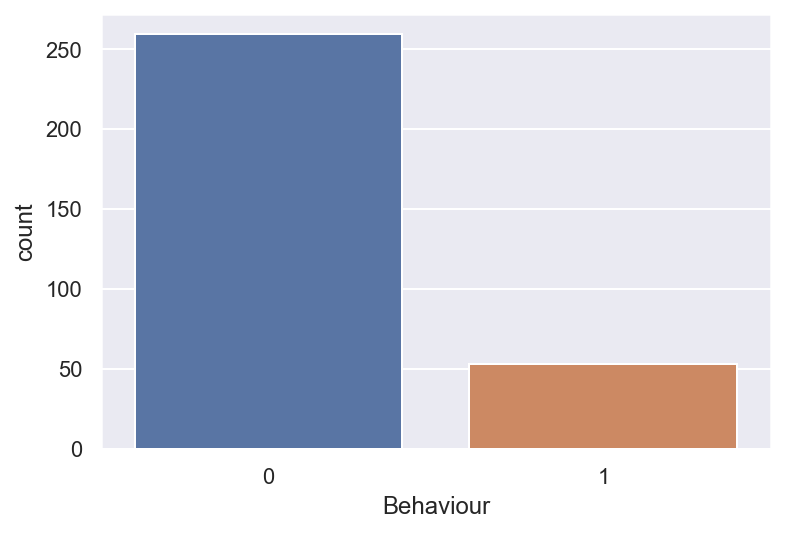

In [11]:
sns.set()
sns.countplot(df.Behaviour)
plt.show()

In [12]:
df['word_length'] = df['Observation'].apply(lambda x:len(x.split()))

In [13]:
df.head()

,timestamp (ET),agitimestamp (ET),Location,level,Observation,Behaviour,word_length
0,12/10/2016 21:02,12/10/2016 21:00,Kitchen,5,Withdrawn,0,1
1,12/15/2016 3:22,12/15/2016 3:21,Kitchen,3,"Vocal1, Withdrawn",0,2
2,12/15/2016 19:14,12/16/2016 2:20,Other,3,Withdrawn,0,1
3,12/19/2016 1:57,12/19/2016 1:55,Other,4,Withdrawn,0,1
4,12/28/2016 20:36,12/28/2016 19:00,Other,4,"Vocal2, Withdrawn",0,2


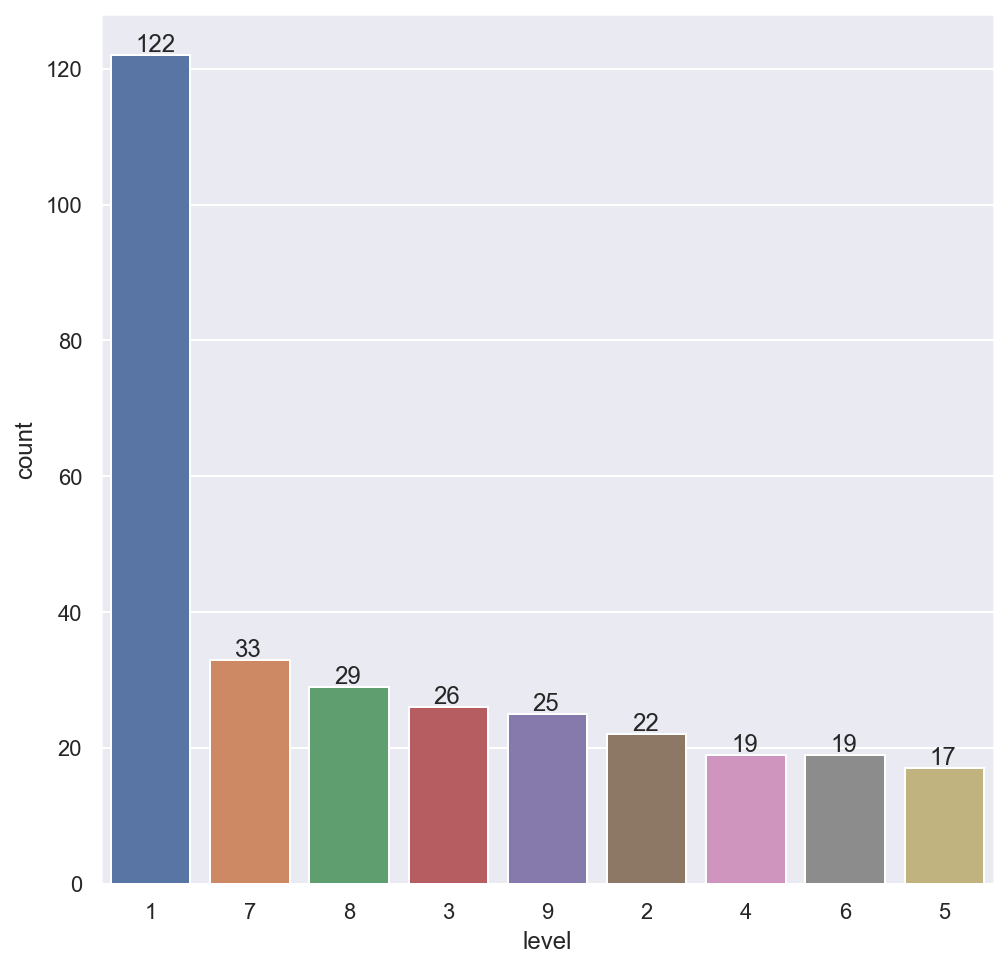

In [20]:
plt.figure(figsize=(8,8))
ax=sns.countplot(x=df["level"],data=df,order=df["level"].value_counts().index)
for p, label in zip(ax.patches, df["level"].value_counts()):
    ax.annotate(label,(p.get_x()+0.25,p.get_height()+0.5))

In [14]:
df_observation=df.groupby('level').filter(lambda x: len(x)>=10)
df.observatioin_group=df_observation.groupby('level')

In [22]:
print(len(df_observation))
print(len(df.observatioin_group))

312
9


<AxesSubplot:xlabel='count', ylabel='Location'>

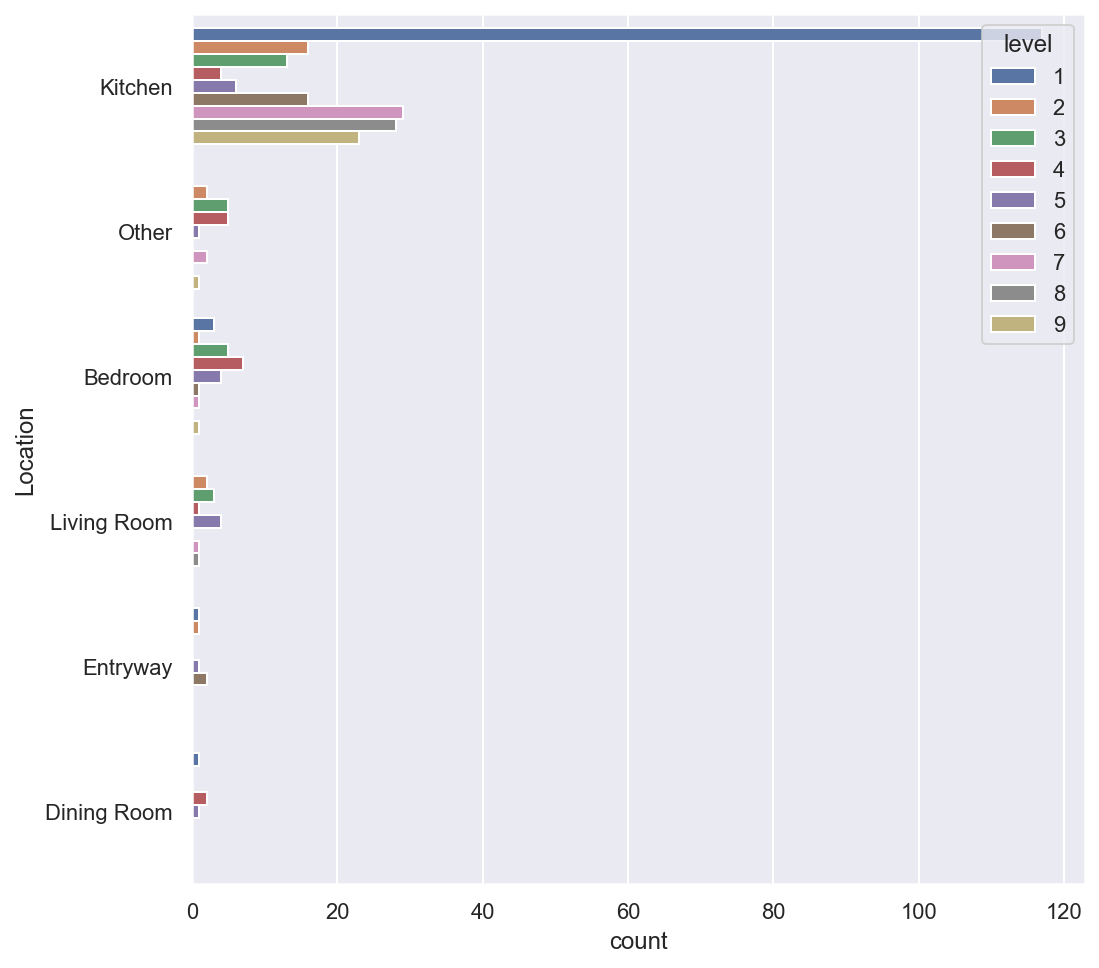

In [23]:
plt.figure(figsize=(8,8))
sns.countplot(y="Location",hue="level",data=df_observation)

In [15]:
df.groupby("Location").count()

,timestamp (ET),agitimestamp (ET),level,Observation,Behaviour,word_length
Location,,,,,,
Bedroom,23,23,23,23,23,23
Dining Room,4,4,4,4,4,4
Entryway,5,5,5,5,5,5
Kitchen,252,252,252,252,252,252
Living Room,12,12,12,12,12,12
Other,16,16,16,16,16,16


In [25]:
df_location=df.groupby("Location").filter(lambda x: len(x)>=4)
df_locationGroup=df_location.groupby("Location")
print(len(df_locationGroup))

6


<AxesSubplot:xlabel='count', ylabel='Location'>

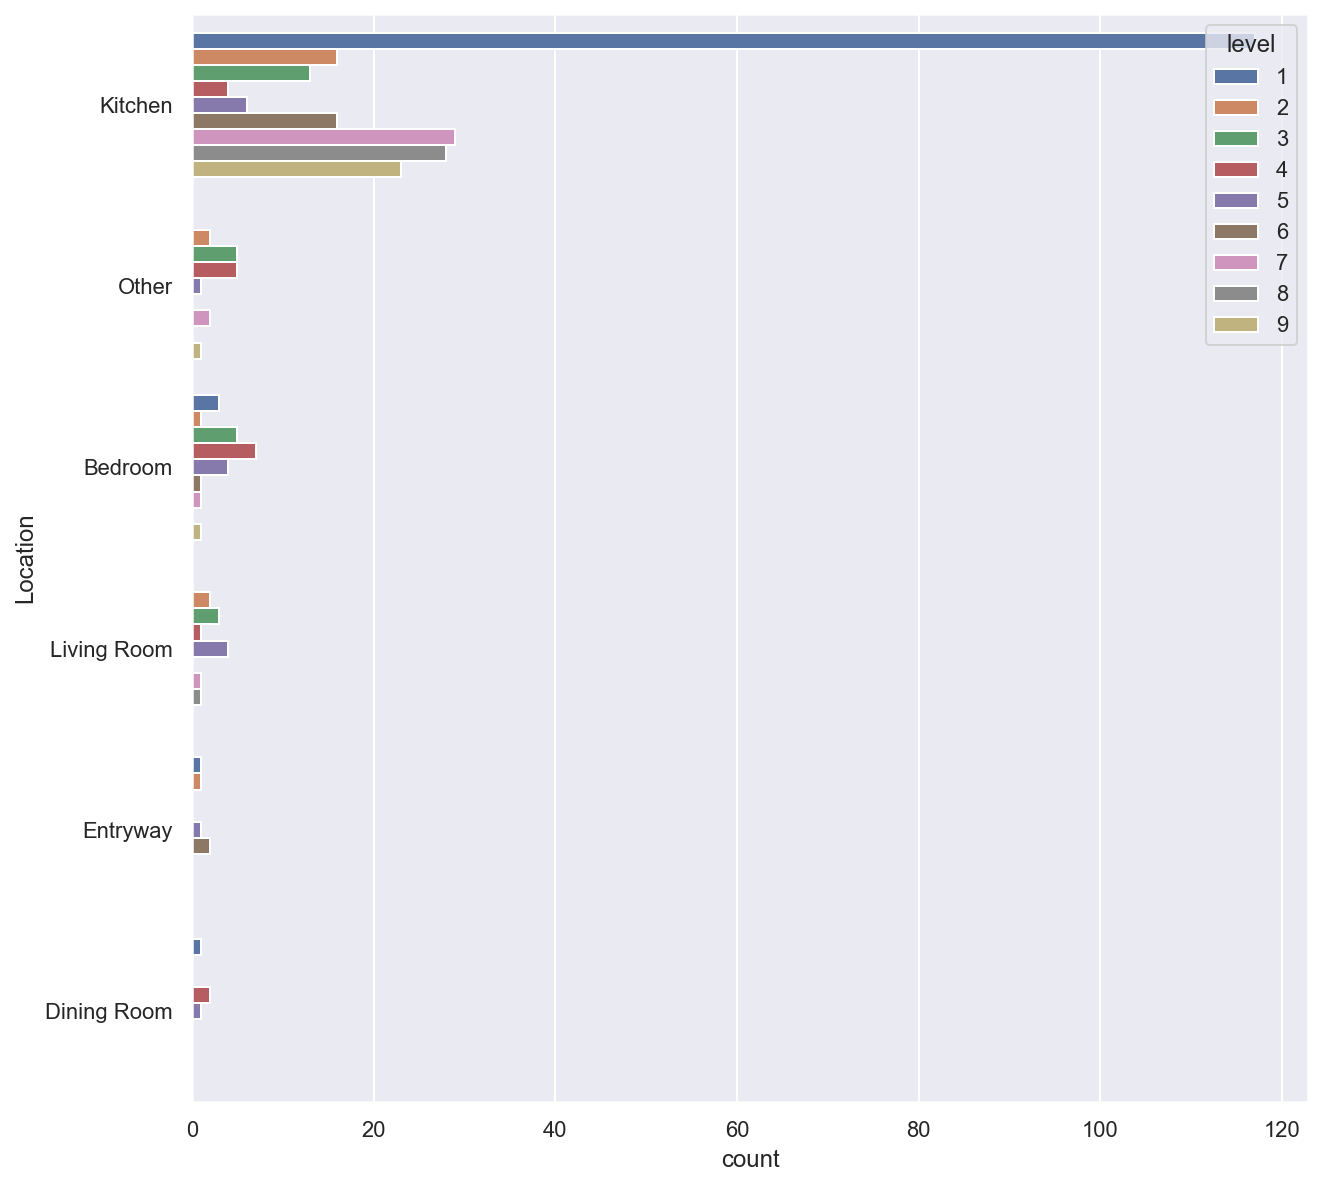

In [26]:
plt.figure(figsize=(10,10))
sns.countplot(y="Location",hue="level",data=df_location)

In [16]:
df['word_length'] = df['Observation'].apply(lambda x:len(x.split()))
df.head(10)

,timestamp (ET),agitimestamp (ET),Location,level,Observation,Behaviour,word_length
0,12/10/2016 21:02,12/10/2016 21:00,Kitchen,5,Withdrawn,0,1
1,12/15/2016 3:22,12/15/2016 3:21,Kitchen,3,"Vocal1, Withdrawn",0,2
2,12/15/2016 19:14,12/16/2016 2:20,Other,3,Withdrawn,0,1
3,12/19/2016 1:57,12/19/2016 1:55,Other,4,Withdrawn,0,1
4,12/28/2016 20:36,12/28/2016 19:00,Other,4,"Vocal2, Withdrawn",0,2
5,12/28/2016 23:57,12/28/2016 23:55,Kitchen,3,Withdrawn,0,1
6,12/29/2016 2:23,12/29/2016 2:03,Bedroom,4,"Communication, Vocal1, Withdrawn",0,3
7,12/31/2016 4:56,12/31/2016 4:52,Bedroom,3,"Vocal1,0",0,1
8,03/03/2017 11:17,03/03/2017 11:16,Other,9,Vocal1; Vocal2;,1,2
9,03/03/2017 23:22,03/03/2017 22:21,Other,7,Repetition; Vocal1; Vocal2;,0,3


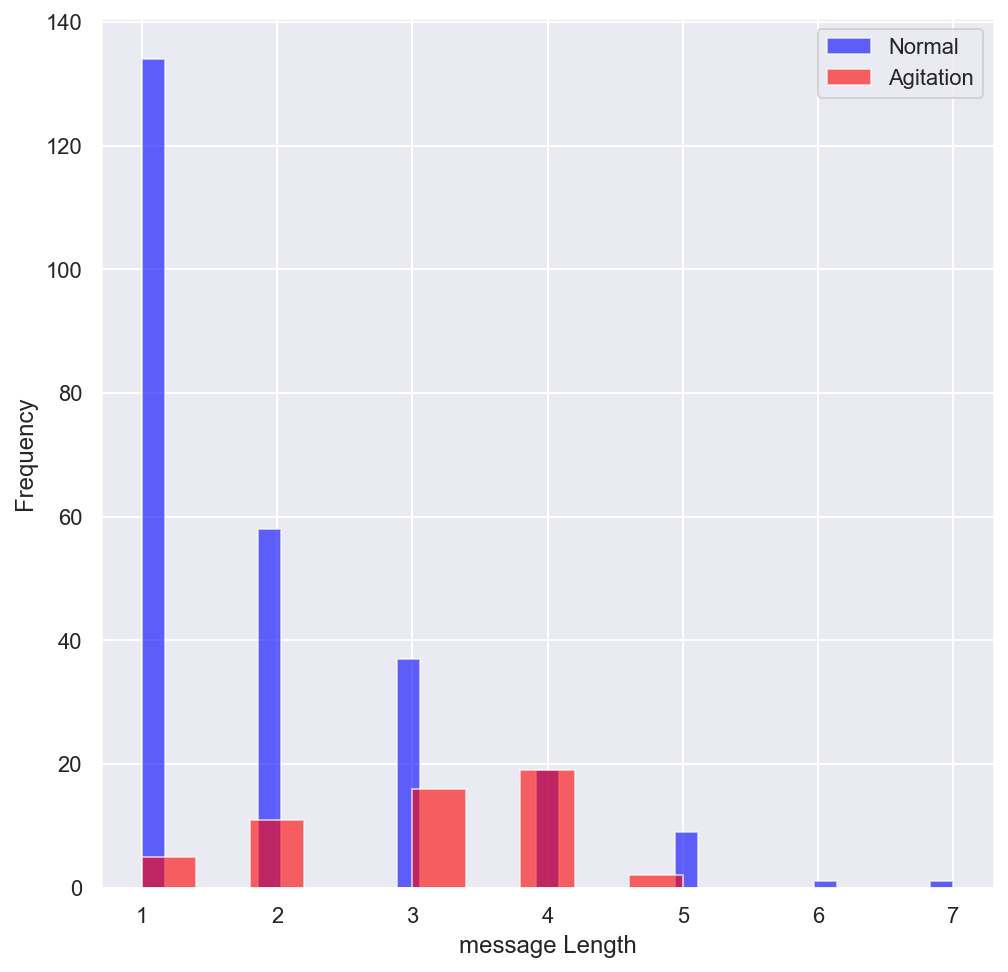

In [28]:
plt.figure(figsize=(8, 8))

df[df.Behaviour==0].word_length.plot(bins=35, kind='hist', color='blue', 
                                       label='Normal', alpha=0.6)
df[df.Behaviour == 1].word_length.plot(kind='hist', color='red', 
                                       label='Agitation', alpha=0.6)
plt.legend()
plt.xlabel("message Length")
plt.show()

In [29]:
df.groupby('Behaviour').mean()

,level,word_length
Behaviour,,
0,2.926641,1.911197
1,8.471698,3.037736


In [30]:
df[df.Behaviour == 0].describe()

,level,Behaviour,word_length
count,259.000000,259.0,259.000000
mean,2.926641,0.0,1.911197
std,2.261582,0.0,1.192609
min,1.000000,0.0,1.000000
25%,1.000000,0.0,1.000000
50%,2.000000,0.0,1.000000
75%,5.000000,0.0,3.000000
max,8.000000,0.0,7.000000


In [17]:
lemmatizer = WordNetLemmatizer()

In [18]:
for index, row in df.iterrows():
    filter_sentence = []
    sentence = row['Observation']
    sentence = re.sub(r'[^\w\s]', '', sentence)  # re move punctuations
    sentence = re.sub(r"[^a-zA-Z0-9]", " ", sentence.lower())
    words = nltk.word_tokenize(sentence)
    words = [w for w in words if not w in stopwords]
    for word in words:
        filter_sentence.append(lemmatizer.lemmatize(word))
    print(filter_sentence)
    df.at[index, 'Observation'] = filter_sentence

['withdrawn']
['vocal1', 'withdrawn']
['withdrawn']
['withdrawn']
['vocal2', 'withdrawn']
['withdrawn']
['communication', 'vocal1', 'withdrawn']
['vocal10']
['vocal1', 'vocal2']
['repetition', 'vocal1', 'vocal2']
['vocal1', 'vocal2']
['vocal2']
['vocal1']
['vocal1', 'vocal2']
['repetition', 'vocal1', 'vocal2']
['withdrawn']
['repetition', 'vocal1', 'vocal2']
['vocal1']
['clothing', 'communication', 'vocal1', 'vocal2']
['vocal1', 'vocal2']
['vocal1', 'vocal2']
['vocal1', 'vocal2']
['vocal1', 'vocal2']
['vocal1', 'vocal2']
['frustration', 'vocal1']
['vocal1', 'vocal2']
['communication', 'vocal1']
['vocal1', 'vocal2']
['communication', 'repetition', 'vocal1']
['communication', 'vocal1', 'vocal2']
['repetition']
['repetition']
['communication']
['repetition']
['frustration']
['withdrawn']
['frustration', 'withdrawn']
['repetition']
['frustration', 'withdrawn']
['frustration', 'withdrawn']
['repetition']
['repetition']
['withdrawn']
['repetition']
['repetition']
['frustration']
['repetition

In [19]:
from nltk.tokenize import word_tokenize

In [22]:
words_list = []
for sentence in df.Observation:
    words_list.extend(nltk.word_tokenize(sentence))
freq_dist = nltk.FreqDist(words_list)
freq_dist.most_common(20)

[(';', 608),
 ('Repetition', 201),
 ('Vocal1', 144),
 ('Communication', 94),
 ('Withdrawn', 80),
 ('Frustration', 42),
 ('Lost', 28),
 ('Vocal2', 25),
 ('Ambulation', 16),
 ('Touching', 12),
 (',', 11),
 ('Clothing', 11),
 ('OralFixation', 4),
 ('Vocal1,0', 1),
 ('Physical2', 1),
 ('Shadowing', 1)]

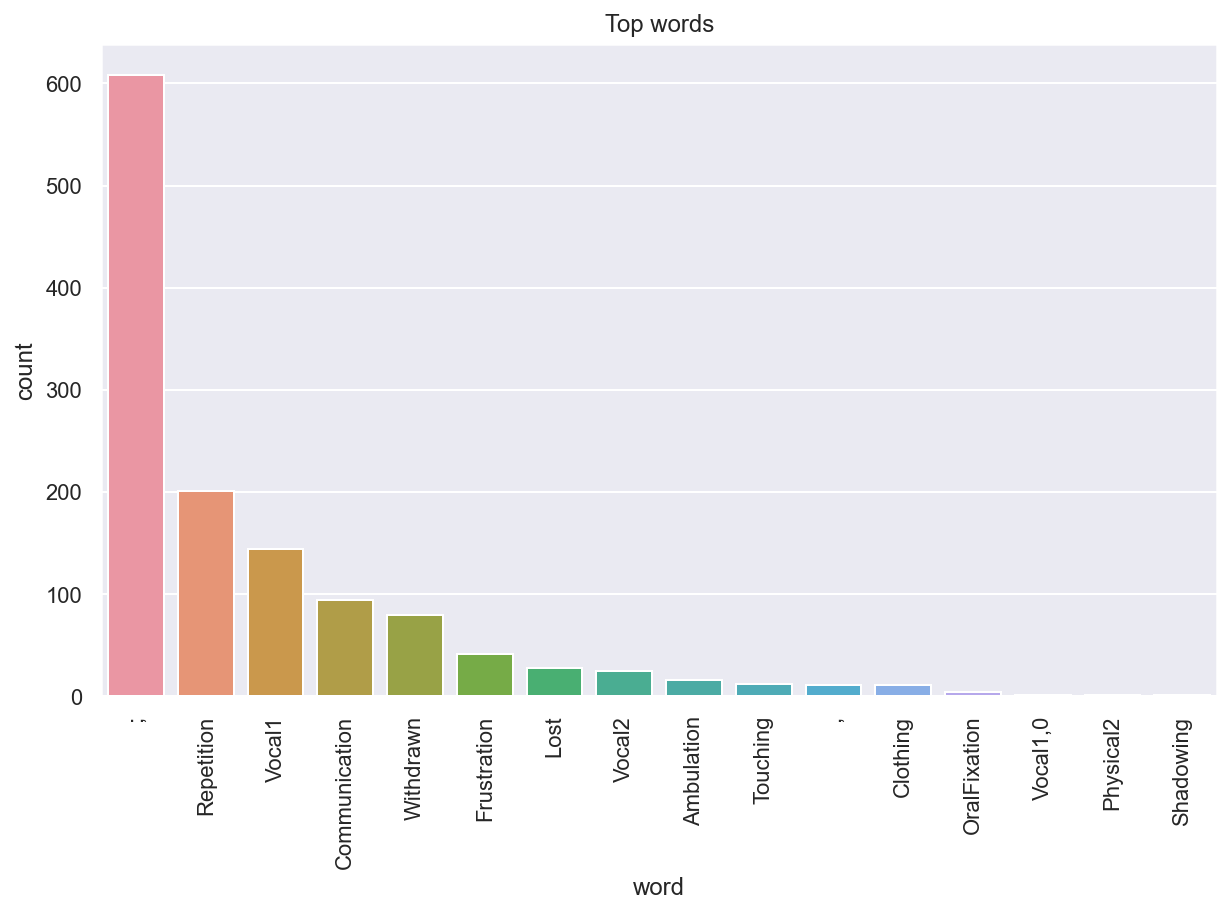

In [37]:
temp = pd.DataFrame(freq_dist.most_common(30),  columns=['word', 'count'])
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='word', y='count', 
            data=temp, ax=ax)
plt.title("Top words")
plt.xticks(rotation='vertical');

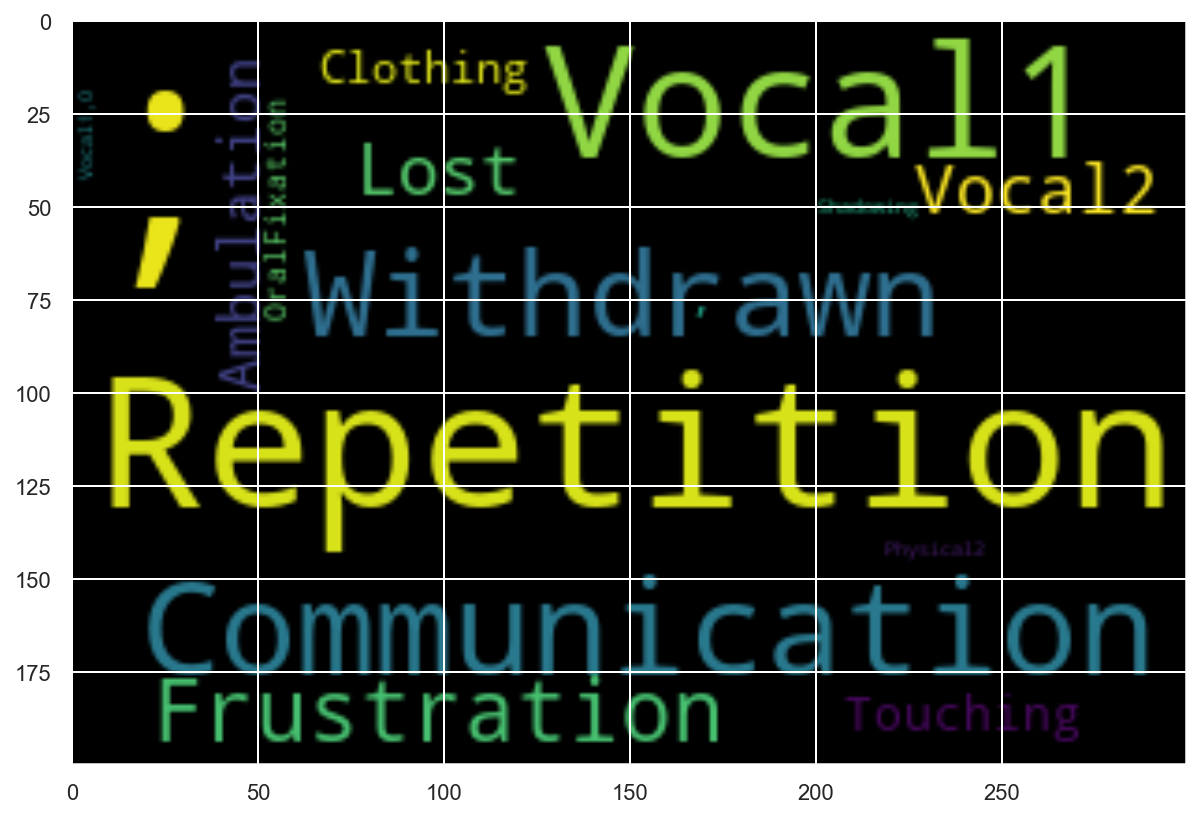

In [38]:
### Creating wordcloud
from wordcloud import WordCloud
import wordcloud
# creation of wordcloud
wcloud_fig = WordCloud( stopwords=set(wordcloud.STOPWORDS),
                      colormap='viridis', width=300, height=200).generate_from_frequencies(freq_dist)

# plotting the wordcloud
plt.figure(figsize=(10,7), frameon=True)

plt.imshow(wcloud_fig, interpolation  = 'bilinear')
plt.show()

In [23]:
from sklearn.preprocessing import LabelEncoder

X = df.Observation
Y = df.Behaviour
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1, 1)

In [24]:
df['Behaviour'] = df['Behaviour'].map({"Normal" : 1,
                                     "Agitation" : 0})

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(df.Observation,df.Behaviour, test_size = 0.3, stratify = df.Behaviour
                                                 ,random_state = 42)

In [26]:
from keras.preprocessing.text import Tokenizer
num_words = 10000 # this means 15000 unique words can be taken 
tokenizer=Tokenizer(num_words,lower=True)
df_total = pd.concat([X_train, X_test], axis = 0)
tokenizer.fit_on_texts(df_total)

In [27]:
len(tokenizer.word_index) 

14

In [28]:
from keras_preprocessing.sequence import pad_sequences

X_train_ =tokenizer.texts_to_sequences(X_train)
X_train_pad=pad_sequences(X_train_,maxlen=171,padding='pre')
X_test_= tokenizer.texts_to_sequences(X_test)
X_test_pad = pad_sequences(X_test_, maxlen = 171, padding = 'pre')

In [29]:
print(X_train_pad.shape,X_test_pad.shape)

(218, 171) (94, 171)


In [30]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, LSTM, Embedding,Bidirectional,GRU,Flatten
import tensorflow
from tensorflow.compat.v1.keras.layers import CuDNNLSTM,CuDNNGRU
from tensorflow.keras.layers import Dropout

In [58]:
EMBEDDING_DIM = 100 # this means the embedding layer will create  a vector in 100 dimension
model = Sequential()
model.add(Embedding(input_dim = num_words,# the whole vocabulary size 
                          output_dim = EMBEDDING_DIM, # vector space dimension
                          input_length= X_train_pad.shape[1] # max_len of text sequence
                          ))
model.add(Dropout(0.4))
model.add(LSTM(100,return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(200,return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(100,return_sequences=False))
model.add(Dense(1, activation = 'sigmoid'))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss = 'binary_crossentropy', optimizer = 'adam',metrics = 'accuracy')

In [59]:
from keras.callbacks import EarlyStopping, ModelCheckpoint


es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 10)
mc = ModelCheckpoint('./model.h5', monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True)

In [60]:
history_embedding = model.fit(X_train_pad,y_train, epochs = 15, batch_size = 120,validation_data=(X_test_pad, y_test),verbose = 1, callbacks= [es, mc]  )

Epoch 1/15
2/2 [==============================] - ETA: 0s - loss: 0.6758 - accuracy: 0.5092
Epoch 1: val_accuracy improved from -inf to 0.82979, saving model to .\model.h5
2/2 [==============================] - 10s 3s/step - loss: 0.6758 - accuracy: 0.5092 - val_loss: 0.5979 - val_accuracy: 0.8298
Epoch 2/15
2/2 [==============================] - ETA: 0s - loss: 0.5683 - accuracy: 0.8303
Epoch 2: val_accuracy did not improve from 0.82979
2/2 [==============================] - 4s 1s/step - loss: 0.5683 - accuracy: 0.8303 - val_loss: 0.4566 - val_accuracy: 0.8298
Epoch 3/15
2/2 [==============================] - ETA: 0s - loss: 0.5486 - accuracy: 0.8303
Epoch 3: val_accuracy did not improve from 0.82979
2/2 [==============================] - 2s 1s/step - loss: 0.5486 - accuracy: 0.8303 - val_loss: 0.5217 - val_accuracy: 0.8298
Epoch 4/15
2/2 [==============================] - ETA: 0s - loss: 0.4815 - accuracy: 0.8303
Epoch 4: val_accuracy did not improve from 0.82979
2/2 [===============

In [61]:
pred = (model.predict(X_test_pad) > 0.5).astype("int32")

3/3 [==============================] - 2s 126ms/step


In [62]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.8297872340425532

In [45]:
from sklearn.metrics import classification_report

In [64]:
print(classification_report(y_test, pred, target_names = ['Agitation','Normal']))

              precision    recall  f1-score   support

   Agitation       0.00      0.00      0.00        16
      Normal       0.83      1.00      0.91        78

    accuracy                           0.83        94
   macro avg       0.41      0.50      0.45        94
weighted avg       0.69      0.83      0.75        94



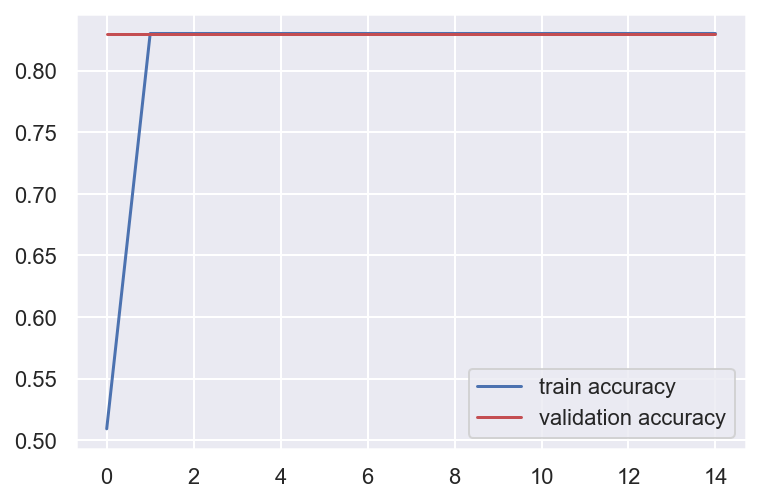

In [65]:
plt.plot(history_embedding.history['accuracy'],c='b',label='train accuracy')
plt.plot(history_embedding.history['val_accuracy'],c='r',label='validation accuracy')
plt.legend(loc='lower right')
plt.show()

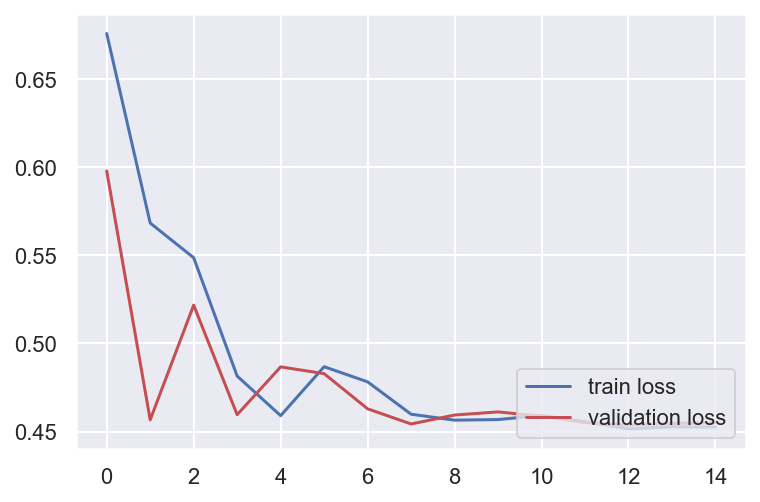

In [66]:
plt.plot(history_embedding.history['loss'],c='b',label='train loss')
plt.plot(history_embedding.history['val_loss'],c='r',label='validation loss')
plt.legend(loc='lower right')
plt.show()

In [31]:
df['Observation_Length'] = df['Observation'].apply(len)

In [32]:
Observation = df['Observation'].values
Behaviour = df['Behaviour'].values

In [33]:
VOCAB_SIZE = 1000
MAX_LEN = df['Observation_Length'].max()
EMBEDDING_VECTOR_SIZE = 50

In [34]:
encoded_message = [one_hot(obs, VOCAB_SIZE) for obs in Observation]
encoded_message

[[137],
 [379, 137],
 [137],
 [137],
 [503, 137],
 [137],
 [873, 379, 137],
 [379, 376],
 [379, 503],
 [17, 379, 503],
 [379, 503],
 [503],
 [379],
 [379, 503],
 [17, 379, 503],
 [137],
 [17, 379, 503],
 [379],
 [525, 873, 379, 503],
 [379, 503],
 [379, 503],
 [379, 503],
 [379, 503],
 [379, 503],
 [740, 379],
 [379, 503],
 [873, 379],
 [379, 503],
 [873, 17, 379],
 [873, 379, 503],
 [17],
 [17],
 [873],
 [17],
 [740],
 [137],
 [740, 137],
 [17],
 [740, 137],
 [740, 137],
 [17],
 [17],
 [137],
 [17],
 [17],
 [740],
 [17],
 [254, 740],
 [873],
 [873, 17],
 [17],
 [17],
 [740, 137],
 [341],
 [254, 740, 137],
 [740],
 [17],
 [17],
 [17],
 [17],
 [740, 137],
 [17],
 [17],
 [17],
 [740],
 [17],
 [341],
 [740, 341],
 [740, 341, 137],
 [740, 137],
 [740, 17],
 [254, 740, 17],
 [254, 740],
 [17],
 [17],
 [740, 17],
 [17],
 [17],
 [17],
 [740, 137],
 [341],
 [503, 137],
 [379, 137],
 [17, 379, 137],
 [503, 137],
 [379, 137],
 [137],
 [525, 740, 379, 137],
 [254, 740, 37, 379, 137],
 [379, 503],

In [35]:
padded_message = pad_sequences(encoded_message, maxlen=MAX_LEN, padding='post')

In [36]:
X = padded_message
y = Behaviour

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

In [38]:
model1 = Sequential()
model1.add(Embedding(VOCAB_SIZE, EMBEDDING_VECTOR_SIZE, input_length = MAX_LEN, name='Embedding'))
model1.add(Bidirectional(LSTM(128, return_sequences=True)))
model1.add(Dropout(0.4))
model1.add(Bidirectional(GRU(64)))
model1.add(Flatten())
model1.add(Dropout(0.4))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

In [39]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Embedding (Embedding)       (None, 75, 50)            50000     
                                                                 
 bidirectional (Bidirectiona  (None, 75, 256)          183296    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 75, 256)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              123648    
 nal)                                                            
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dropout_1 (Dropout)         (None, 128)               0

In [40]:
model1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [41]:
history = model1.fit(X_train, y_train, validation_data = (X_test,y_test), epochs=15, batch_size=100)

Epoch 1/15
3/3 [==============================] - 13s 2s/step - loss: 0.6931 - accuracy: 0.5183 - val_loss: 0.6454 - val_accuracy: 0.9149
Epoch 2/15
3/3 [==============================] - 3s 1s/step - loss: 0.6506 - accuracy: 0.7936 - val_loss: 0.5426 - val_accuracy: 0.9149
Epoch 3/15
3/3 [==============================] - 4s 1s/step - loss: 0.5810 - accuracy: 0.7936 - val_loss: 0.3162 - val_accuracy: 0.9149
Epoch 4/15
3/3 [==============================] - 4s 1s/step - loss: 0.5522 - accuracy: 0.7936 - val_loss: 0.2957 - val_accuracy: 0.9149
Epoch 5/15
3/3 [==============================] - 5s 2s/step - loss: 0.5163 - accuracy: 0.7936 - val_loss: 0.3522 - val_accuracy: 0.9149
Epoch 6/15
3/3 [==============================] - 3s 1s/step - loss: 0.5106 - accuracy: 0.7936 - val_loss: 0.3816 - val_accuracy: 0.9149
Epoch 7/15
3/3 [==============================] - 5s 2s/step - loss: 0.5096 - accuracy: 0.7936 - val_loss: 0.3724 - val_accuracy: 0.9149
Epoch 8/15
3/3 [========================

In [42]:
pred1 = (model1.predict(X_test) > 0.5).astype("int32")

3/3 [==============================] - 2s 64ms/step


In [43]:
accuracy_score(y_test,pred1)

0.9148936170212766

In [46]:
print(classification_report(y_test, pred1, target_names = ['Agitation','Normal']))

              precision    recall  f1-score   support

   Agitation       0.00      0.00      0.00         8
      Normal       0.91      1.00      0.96        86

    accuracy                           0.91        94
   macro avg       0.46      0.50      0.48        94
weighted avg       0.84      0.91      0.87        94



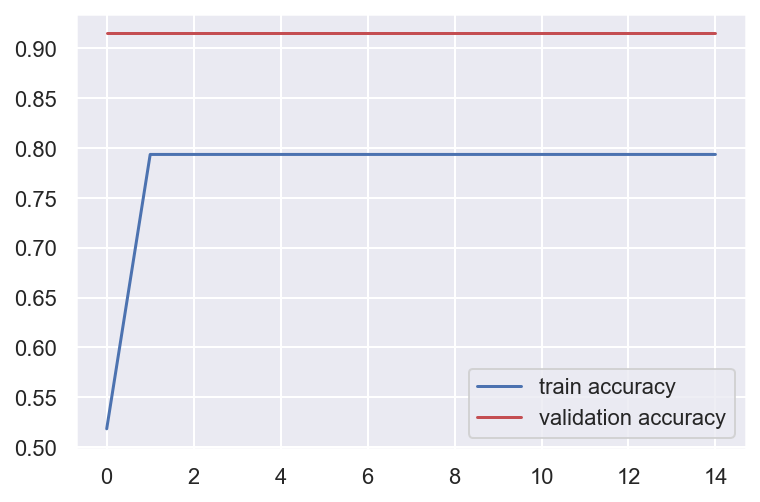

In [47]:
plt.plot(history.history['accuracy'],c='b',label='train accuracy')
plt.plot(history.history['val_accuracy'],c='r',label='validation accuracy')
plt.legend(loc='lower right')
plt.show()

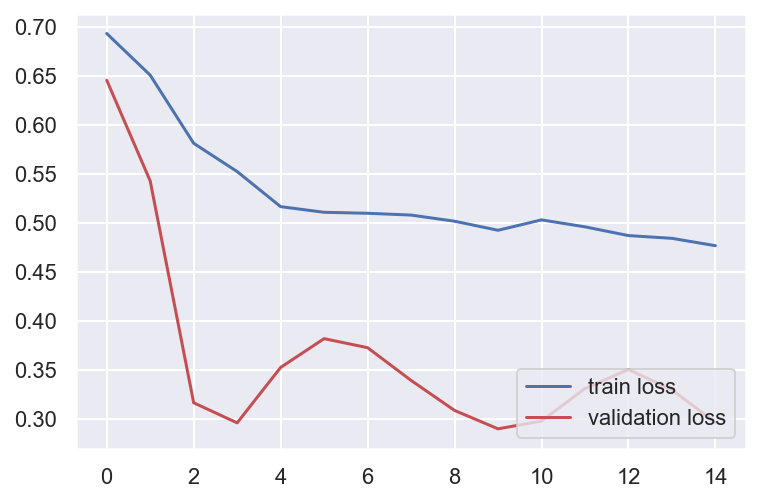

In [48]:
plt.plot(history.history['loss'],c='b',label='train loss')
plt.plot(history.history['val_loss'],c='r',label='validation loss')
plt.legend(loc='lower right')
plt.show()